# Ridge_Lasso_ElasticNet

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :3]])
boston_data = pd.DataFrame(data, columns =['crime', 'land_zone', 'indus', 'C_River', 'nox','avg_rooms', 'age','dist','r_highway', 'tax', 'pt_ratio','blacks','lstat','price_median_value'])

In [4]:
#Split Data into X and y
#array = boston_data.values
# input 
X = boston_data.iloc[:, :-1] 

#output 
y = boston_data.iloc[:, -1] 

print(boston_data.head()) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

     crime  land_zone  indus  C_River    nox  avg_rooms   age    dist  \
0  0.00632       18.0   2.31      0.0  0.538      6.575  65.2  4.0900   
1  0.02731        0.0   7.07      0.0  0.469      6.421  78.9  4.9671   
2  0.02729        0.0   7.07      0.0  0.469      7.185  61.1  4.9671   
3  0.03237        0.0   2.18      0.0  0.458      6.998  45.8  6.0622   
4  0.06905        0.0   2.18      0.0  0.458      7.147  54.2  6.0622   

   r_highway    tax  pt_ratio  blacks  lstat  price_median_value  
0        1.0  296.0      15.3  396.90   4.98                24.0  
1        2.0  242.0      17.8  396.90   9.14                21.6  
2        2.0  242.0      17.8  392.83   4.03                34.7  
3        3.0  222.0      18.7  394.63   2.94                33.4  
4        3.0  222.0      18.7  396.90   5.33                36.2  


((339, 13), (339,), (167, 13), (167,))

In [7]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(X_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(X_test) 

print(lreg_y_pred)

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = X_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

[20.67463738 22.97217694 36.94236236  7.51698796 19.27840685 24.60266781
 20.93652728 14.87889096 12.79136143 34.54066081 13.37147595 24.82516864
 26.14550119 16.04848457 30.66366437 18.62238798 16.47185413 19.10850935
  5.57162371 15.95418994 20.31940481 34.65555242 25.10693143 19.82800946
 18.55447769 24.26577591 25.98891847 36.24638022 37.46823453 22.14702836
  7.32883543 16.860608   22.92284764 16.37460673 14.10703474 20.26973444
 17.70670273 22.31459177 12.29186731 28.53198761 19.6655285  33.87603121
 23.89758716 39.94822696 37.17535287 16.98235651 17.71652    24.74865941
 23.47020709 11.52401931 23.52066722 17.90153393 24.72248018 24.18349927
 24.72462841 14.72838659 17.34913679 24.197649   30.39351106 18.20616988
 15.55481782 17.88822936 35.21553794 19.94703888 21.00344041 23.80048043
 34.16279921 23.8905326  25.15388102 27.40820941 17.60728816 20.12300614
 28.38371069 19.1971442  20.57703125 25.07917133  6.38857097 29.5492178
 38.73716301 19.31119324 32.40854694 37.62986133 22.

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

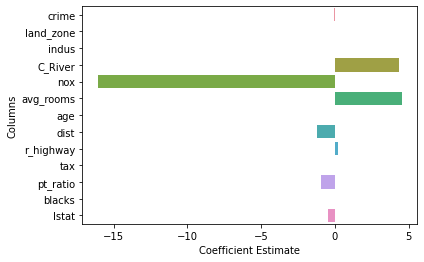

In [8]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [10]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train, y_train) 
y_pred = ridgeR.predict(X_test) 

print(y_pred)

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

[20.77802383 22.95452168 36.68967434  7.74699822 19.42314666 24.88516776
 20.57622711 14.11595923 12.80982588 34.39604792 13.25483542 26.53448798
 26.00698581 16.77082149 30.33460809 18.95024029 17.98716559 19.07197889
  5.27705921 15.20058442 19.71453753 35.18877155 24.92455142 19.41085466
 18.69292786 24.27429903 25.87981714 36.84844482 37.45908853 21.96394016
  6.54188105 17.16854232 22.78976185 17.62272082 13.66674151 20.13809354
 18.19471336 22.13958171 13.6906998  28.45790752 19.32705718 33.81616149
 23.52656469 39.76411044 36.71069082 17.16670424 18.2417556  24.76963366
 22.76909399 11.68568778 24.01797847 18.58779168 24.02092183 23.68594761
 24.83136109 14.87453513 17.58932949 24.20491581 30.24964964 19.13763018
 15.79743456 17.5626054  35.70231837 19.1564828  21.34136989 23.55091039
 33.93068344 23.77153101 25.35614766 26.90458234 18.17172075 20.63050866
 28.0854766  19.38870566 21.01069427 24.74348376  6.04920393 29.31526673
 39.07546202 18.73676057 32.17183974 37.36376968 22

In [ ]:
# import Lasso regression from sklearn library

In [ ]:
# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

# Train the model 
lasso = Lasso(alpha = 1)

# Train the model 
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test) 
print(y_pred1)

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 

lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 


In [11]:
# grid search hyperparameters for lasso regression
#Alpha parameter tuning with RepeartedKFold
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

# Train the model 
lasso = Lasso(alpha = 1)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0,1, 0.001)
# define search
search = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, Y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


# Train the model 
lasso = Lasso(alpha = 0.014)
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test) 
print(y_pred1)

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 

lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 


MAE: -3.377
Config: {'alpha': 0.014}
[20.73642303 22.95237891 36.79406722  7.66778788 19.3803243  24.80442269
 20.72806112 14.42984517 12.82319555 34.44091687 13.29041716 25.89271603
 26.07029636 16.52010065 30.47701098 18.83481046 17.41580822 19.11370832
  5.38721307 15.49733115 19.95471221 34.97822695 24.98918522 19.57408949
 18.63906205 24.28138239 25.92535981 36.60880114 37.44701396 22.04124209
  6.88982571 17.06904515 22.85050568 17.04904338 13.86333835 20.19788011
 18.01789027 22.2080236  13.13996727 28.48741737 19.47088852 33.82327925
 23.69107585 39.82260651 36.7879739  17.10946506 18.04901917 24.78070324
 23.04682492 11.63027035 23.82811133 18.35096608 24.30208484 23.89827799
 24.80158372 14.81567978 17.52000116 24.22767157 30.31263355 18.78802518
 15.72890752 17.70522453 35.51276173 19.46358951 21.2286121  23.67183306
 34.01534187 23.82126261 25.28433921 27.12502047 17.95872708 20.44520966
 28.20695987 19.32352463 20.83413657 24.8726942   6.20776911 29.42391281
 38.93015436 1

In [47]:
# grid search hyperparameters for lasso regression
#alpha parameter tuning with K fold cross validation
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# Train the model 
lasso = Lasso(alpha = 1)

from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation for alpha parameter
model = LassoCV(cv=5, random_state=0, max_iter=10000)
# Fit model
model.fit(X_train, y_train)
LassoCV(cv=5, max_iter=10000, random_state=0)
print("Alpha paramenter:",model.alpha_)

# Train the model 
lasso = Lasso(alpha = 0.79)
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test) 
print(y_pred1)

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 

lasso_coeff = pd.DataFrame() 
#lasso_coeff["Columns"] = X_train.columns 
#lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

#print(lasso_coeff) 


Alpha paramenter: 0.7987717031700039
[16.8905322  29.05256124 26.19257877 24.06803484 30.98923822 19.94226477
 31.33757491 26.63253142 18.3903584  31.08347666 23.32976661 21.48515679
 20.99494242 16.46991645 14.3000957  28.7977055  13.53671393 26.19935275
 21.73192029 29.92876184 20.00462815 28.6278386  18.30796613 24.05782471
 21.26147677 12.15449039 26.32019715 26.9694261  21.92381    24.09928528
 24.34937795 24.2416439  27.57170838 27.23667826 21.9045651  24.15170735
 22.56781242 29.43671343  8.12794239 12.3405188  26.6372236  25.7177117
 22.98871301 30.02715249 20.02924853 29.57646019 25.10324956 20.03719369
 33.34019463 28.36459789 29.10053453 22.05193023 28.94866015 19.59575734
 32.05586093 11.53655095 16.81704005 20.33124011 16.29164156 38.2912133
 22.13027205 22.90848722 22.22929387 24.25863703 24.26601389 24.94521217
 17.96384867 30.65843921 33.43954954 21.1833451  13.27815228 17.16359093
 16.94392372 17.64117981 31.76410491 29.61811356 25.92522047 25.86711586
 23.68598253 16.

In [36]:
# import model 
from sklearn.linear_model import ElasticNet
# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(X_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(X_test) 
#print(y_pred_elastic)

mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
#print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

,Columns,Coefficient Estimate
0,crime,-0.092775
1,land_zone,0.039661
2,indus,-0.061884
3,C_River,0.000000
4,nox,-0.000000
5,avg_rooms,1.855378
6,age,-0.000019
7,dist,-0.911513
8,r_highway,0.289878
9,tax,-0.016705
